In [1]:
import torch 
from torch.utils.data import Dataset

class my_data(Dataset):
    def __init__(self, size):
        self.size=size
        self.data = [(torch.rand(20), torch.rand(1)) for _ in range(size)]
    
    def __len__(self):
        return self.size
    
    
    def __getitem__(self, index):  
        return self.data[index]

In [3]:
# download teh data from pytorch
import torch as th
from torch import nn

x = th.randn(100_00, 21, device='cuda')
y = th.randint(0, 2, size=(100_00,), device='cuda')


RuntimeError: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero.

In [4]:
class xx(nn.Module):
    def __init__(self):
        super(xx, self).__init__()
        self.fc1 = nn.Linear(21, 10, device='cuda')
        self.fc2 = nn.Linear(10, 1, device='cuda')
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x
    
model = xx().to('cuda')

RuntimeError: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero.

In [5]:
output = model(x)
print(output.shape)

NameError: name 'model' is not defined

In [6]:
loss = nn.BCELoss(reduction="mean")


In [7]:
output.shape

NameError: name 'output' is not defined

In [8]:
y.dtype

NameError: name 'y' is not defined

In [9]:
output.shape

NameError: name 'output' is not defined

In [10]:
loss(output, y.reshape(-1, 1).float())

NameError: name 'output' is not defined

In [11]:
y.reshape(-1,1).shape

NameError: name 'y' is not defined

In [12]:
th.where(output.squeeze() >0.5, 1, 0)

NameError: name 'output' is not defined

In [13]:
y.unsqueeze(1).float().device

NameError: name 'y' is not defined

In [14]:
y.shape

NameError: name 'y' is not defined

In [15]:
y = y.unsqueeze(1).float()

NameError: name 'y' is not defined

In [16]:
criterion = nn.BCELoss(reduction="mean")
optimizer=th.optim.Adam(model.parameters(), lr=0.01)

from sklearn.metrics import accuracy_score

for epoch in range(10):
    output = model(x)
    loss = criterion(output, y)
    
    loss.backward()
    # loss = criterion.item()
    optimizer.step()
    optimizer.zero_grad()
    prediction = th.where(output.squeeze()> 0.5, 1,0)
    accuracy = accuracy_score(y.cpu().numpy(), prediction.cpu().numpy())
    
    print(f"Epoch: {epoch}, Loss: {loss}, Accuracy: {accuracy}")
    

NameError: name 'model' is not defined

In [17]:
from torchsummary import summary
summary(model, input_size=(100, 21))

NameError: name 'model' is not defined

In [18]:
for layer in model.children():
    print(layer)

NameError: name 'model' is not defined

In [19]:
# freeze layer 
for param in model.parameters():
    param.requires_grad = False

NameError: name 'model' is not defined

In [20]:
output = model(x)
print(output.shape)

NameError: name 'model' is not defined

# Dataloader

there are 2 ways to use dataloader
1. use the dataloader to load the data and then pass it to the model
2. define your own class to load the model

In [29]:
from torch.utils.data import DataLoader, TensorDataset

x = th.randn(100_00, 21, device='cuda')
y = th.randint(0, 2, size=(100_00,), device='cuda').unsqueeze(1).float()

dataset = TensorDataset(x, y)


In [30]:
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [36]:
for epoch in range(10):
    for x, y in data_loader:
        # print(x.shape, y.shape)
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        prediction = th.where(output.squeeze() > 0.5, 1, 0)
        accuracy = accuracy_score(y.cpu().numpy(), prediction.cpu().numpy())
    print(f"Epoch: {epoch}, Loss: {loss}, Accuracy: {accuracy}")

Epoch: 0, Loss: 0.6746161580085754, Accuracy: 0.6875
Epoch: 1, Loss: 0.6863539814949036, Accuracy: 0.5
Epoch: 2, Loss: 0.7230405807495117, Accuracy: 0.5
Epoch: 3, Loss: 0.7377834916114807, Accuracy: 0.375
Epoch: 4, Loss: 0.6551187038421631, Accuracy: 0.6875
Epoch: 5, Loss: 0.7172971963882446, Accuracy: 0.3125
Epoch: 6, Loss: 0.6193863153457642, Accuracy: 0.625
Epoch: 7, Loss: 0.6466734409332275, Accuracy: 0.5
Epoch: 8, Loss: 0.6777801513671875, Accuracy: 0.4375
Epoch: 9, Loss: 0.6534846425056458, Accuracy: 0.5


In [1]:
import torch as th
import numpy as np

x = np.random.rand(100_00, 21)
x = th.from_numpy(x)

In [2]:
x

tensor([[0.3245, 0.6732, 0.4554,  ..., 0.9512, 0.1030, 0.1842],
        [0.2601, 0.1561, 0.4534,  ..., 0.1793, 0.9448, 0.4561],
        [0.0768, 0.7468, 0.8274,  ..., 0.6549, 0.6207, 0.1787],
        ...,
        [0.5243, 0.5897, 0.3898,  ..., 0.8772, 0.2594, 0.9182],
        [0.1296, 0.3409, 0.8784,  ..., 0.7488, 0.7794, 0.7025],
        [0.8361, 0.4352, 0.8315,  ..., 0.1592, 0.2926, 0.2516]],
       dtype=torch.float64)

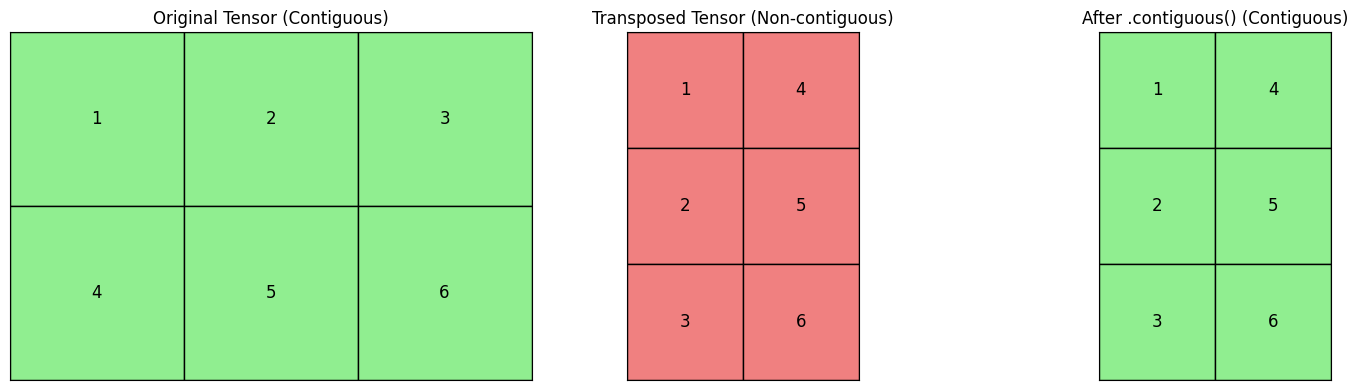

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def plot_tensor(tensor, title, ax, highlight_contiguous=True):
    rows, cols = tensor.shape
    flat_tensor = tensor.contiguous().view(-1).tolist()  # flatten for memory representation
    
    # Plot the 2D shape of tensor
    ax.set_title(title)
    for i in range(rows):
        for j in range(cols):
            value = tensor[i][j].item()
            color = 'lightgreen' if highlight_contiguous else 'lightcoral'
            ax.text(j, i, str(value), va='center', ha='center', fontsize=12)
            ax.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, edgecolor='black', facecolor=color))
    ax.set_xlim(-0.5, cols - 0.5)
    ax.set_ylim(rows - 0.5, -0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

# Original tensor
x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

# Transposed tensor (non-contiguous)
x_t = x.t()

# Make transposed tensor contiguous
x_t_contig = x_t.contiguous()

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
plot_tensor(x, "Original Tensor (Contiguous)", axes[0], highlight_contiguous=True)
plot_tensor(x_t, "Transposed Tensor (Non-contiguous)", axes[1], highlight_contiguous=False)
plot_tensor(x_t_contig, "After .contiguous() (Contiguous)", axes[2], highlight_contiguous=True)

plt.tight_layout()
plt.show()
